In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="text-align: center; color: yellowgreen; font-size:32px; padding:20px ">
.       TRANSFORMATION      .  <BR>     

</div>

In [4]:
df = pd.read_csv('clean.csv')
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_log,enginesize_log,curbweight_log
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495.0,9.510075,4.867534,7.843064
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500.0,9.711116,4.867534,7.843064
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500.0,9.711116,5.023881,7.945555
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950.0,9.543235,4.691348,7.756623
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450.0,9.767095,4.912655,7.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.15,9.5,114,5400,23,28,16845.0,9.731809,4.948760,7.990238
196,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.15,8.7,160,5300,19,25,19045.0,9.854560,4.948760,8.022569
197,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,2.87,8.8,134,5500,18,23,21485.0,9.975110,5.153292,8.010360
198,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.40,23.0,106,4800,26,27,22470.0,10.019936,4.976734,8.076205


In [5]:
df_c = df.select_dtypes(include=['object'])  #Creo el df de las columnas actegoricas a transformar

In [6]:
df_c

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
195,gas,std,four,sedan,rwd,front,ohc,four,mpfi
196,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
197,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
198,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [7]:
nombres_columnas_df_c = df_c.columns.to_list() # copio los nombres de las columnas a una lista

for columna in nombres_columnas_df_c:  # Creo el bucle para ver la imformacion de cada columna
    cc_u = df_c[columna].value_counts() 
    print(cc_u)

fueltype
gas       180
diesel     20
Name: count, dtype: int64
aspiration
std      163
turbo     37
Name: count, dtype: int64
doornumber
four    114
two      86
Name: count, dtype: int64
carbody
sedan          93
hatchback      69
wagon          25
hardtop         7
convertible     6
Name: count, dtype: int64
drivewheel
fwd    120
rwd     71
4wd      9
Name: count, dtype: int64
enginelocation
front    197
rear       3
Name: count, dtype: int64
enginetype
ohc      147
ohcf      15
l         12
ohcv      11
dohc      10
rotor      4
dohcv      1
Name: count, dtype: int64
cylindernumber
four      157
six        23
five       11
two         4
eight       3
three       1
twelve      1
Name: count, dtype: int64
fuelsystem
mpfi    89
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


#### Bucle para crear las columnas dummies de lso valores categoricos

In [9]:
# Creo la lista de con los nombres de las columnas.
columnas_a_dummies = df_c.columns.to_list()
print(columnas_a_dummies)


['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [10]:
df1 = df.copy()

In [11]:
#Creo el bucle
# !!!!!!!!!!!!! El df a utilizar tiene que ser el que tiene todas las columnas ''df'' NO EL DE EXPLORACION "df_c"
for columna in columnas_a_dummies:
    dummy_actual = pd.get_dummies(df[columna], prefix=columna,dtype=int)
    df1= pd.concat([df1, dummy_actual], axis=1)
    df1.drop(columna, axis=1, inplace=True)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              200 non-null    int64  
 1   wheelbase              200 non-null    float64
 2   carlength              200 non-null    float64
 3   carwidth               200 non-null    float64
 4   carheight              200 non-null    float64
 5   curbweight             200 non-null    int64  
 6   enginesize             200 non-null    int64  
 7   boreratio              200 non-null    float64
 8   stroke                 200 non-null    float64
 9   compressionratio       200 non-null    float64
 10  horsepower             200 non-null    int64  
 11  peakrpm                200 non-null    int64  
 12  citympg                200 non-null    int64  
 13  highwaympg             200 non-null    int64  
 14  price                  200 non-null    float64
 15  price_

In [13]:
df1.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.8400,98.598500,173.708000,65.857500,53.713000,2541.655000,124.995000,3.324500,3.255550,10.182100,...,0.005000,0.020000,0.055000,0.330000,0.015000,0.100000,0.005000,0.445000,0.045000,0.005000
std,1.2579,5.788548,12.027595,2.074454,2.459548,507.660311,37.541334,0.269156,0.316739,4.012131,...,0.070711,0.140351,0.228552,0.471393,0.121857,0.300753,0.070711,0.498213,0.207824,0.070711
min,-2.0000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,94.500000,166.300000,64.100000,52.000000,2143.750000,97.000000,3.150000,3.110000,8.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,96.950000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.0000,101.400000,181.550000,66.525000,55.500000,2922.250000,141.000000,3.580000,3.410000,9.400000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.0000,115.600000,202.600000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="text-align: center; color: yellowgreen; font-size:32px; padding:20px ">
.       COLUMNA 'GAMA ALTA'     .  <BR>     

</div>

In [14]:
# Obtengo el valor medio de la columna 'price' y lo guardo en una variable.
valor_medio_price = df['price'].mean()

In [15]:
#Creo la columna 'gama' comparandola con el valor medio de la columna price.

df1['gama'] = (df1['price'] > valor_medio_price).astype(int)

<div style="text-align: center; color: yellowgreen; font-size:32px; padding:20px ">
.       MATRIZ DE CORRELACION       .  <BR>   
   
</div>

In [19]:
df2=df1.copy()

In [20]:
corMatriz = df2.corr()

### Seleccionamos las correlaciones mayores a 0.1 que son significativas para el modelo.

In [21]:
cor_target = abs(corMatriz["gama"]) # Aqui tomamos encuenta tanto los valores positivos como negativos.
relevant_features = cor_target[cor_target>0.1] # Con esto definimos que solo traiga valores mayores a 0.1
relevant_features

wheelbase               0.539778
carlength               0.643023
carwidth                0.663290
carheight               0.157056
curbweight              0.764175
enginesize              0.655917
boreratio               0.464379
compressionratio        0.113943
horsepower              0.688941
citympg                 0.641770
highwaympg              0.653205
price                   0.779799
price_log               0.844999
enginesize_log          0.678717
curbweight_log          0.764239
fueltype_diesel         0.147282
fueltype_gas            0.147282
aspiration_std          0.284608
aspiration_turbo        0.284608
carbody_convertible     0.162035
carbody_hatchback       0.206755
carbody_sedan           0.127626
drivewheel_fwd          0.591487
drivewheel_rwd          0.637019
enginelocation_front    0.155968
enginelocation_rear     0.155968
enginetype_dohc         0.289955
enginetype_l            0.189512
enginetype_ohc          0.363095
enginetype_ohcf         0.108259
enginetype

### Seleccionamos las correlaciones menores a 0.1 que NO son significativas para el modelo.

In [23]:
irrelevant_features = cor_target[cor_target<=0.1] # Con esto definimos que solo traiga valores mayores a 0.1
l_irrelevant = cor_target[cor_target<=0.1] .index.to_list() #Creo un a lista con los nombres de las columnas irrelevantes.
# Para luego eliminarlas del df
irrelevant_features
print(l_irrelevant)

['symboling', 'stroke', 'peakrpm', 'doornumber_four', 'doornumber_two', 'carbody_hardtop', 'carbody_wagon', 'drivewheel_4wd', 'enginetype_dohcv', 'enginetype_rotor', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_4bbl', 'fuelsystem_mfi', 'fuelsystem_spdi', 'fuelsystem_spfi']


In [24]:
df2 = df2.drop(l_irrelevant, axis=1)
df2.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,citympg,...,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,gama
0,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111,21,...,0,0,0,1,0,0,0,0,1,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111,21,...,0,0,0,1,0,0,0,0,1,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,9.0,154,19,...,1,0,0,0,1,0,0,0,1,1


### Graficamos la matriz de correlacion

In [25]:
newCor = df2.corr()

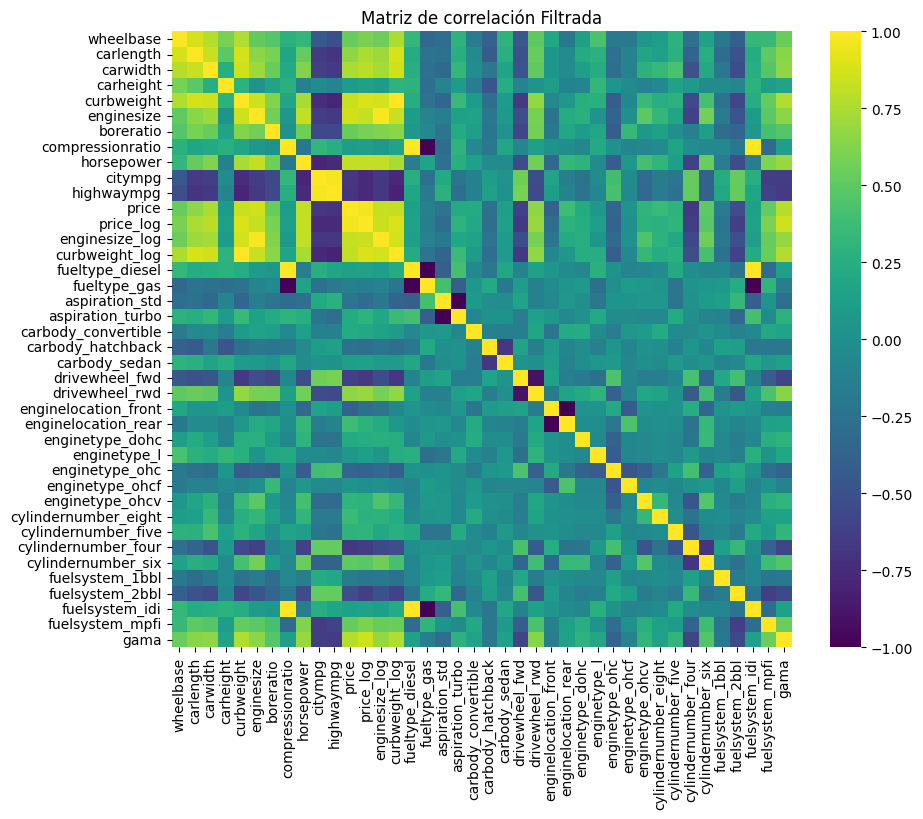

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(newCor, annot=False, cmap='viridis', fmt=".2f")

plt.title('Matriz de correlación Filtrada')

plt.show()

In [31]:
#salvo en df en el archivo transformado.csv
df2.to_csv('transformado.csv', index=False)